In [1]:
from function import *
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import TensorBoard

In [2]:
label_map = {label:num for num, label in enumerate(actions)}
# print(label_map)
sequences, labels = [], []

In [3]:
label_map

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'K': 9,
 'L': 10,
 'M': 11,
 'N': 12,
 'O': 13,
 'P': 14,
 'Q': 15,
 'R': 16,
 'S': 17,
 'T': 18,
 'U': 19,
 'V': 20,
 'W': 21,
 'X': 22,
 'Y': 23}

In [4]:
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [11]:
no_sequences

15

In [12]:
sequence_length

15

In [15]:
len(labels)

360

In [5]:
X = np.array(sequences)
y = to_categorical(labels).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.07,stratify=y)

In [24]:
X.shape

(360, 15, 63)

In [10]:
X[0][0].shape

(63,)

In [19]:
y[16]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [25]:
y_train.shape

(334, 24)

In [26]:
y_test

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0

In [8]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(15,63)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [9]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.fit(X_train, y_train, epochs=200, callbacks=[tb_callback])
model.summary()


Epoch 1/200
11/11 [==============================] - 7s 20ms/step - loss: 3.1710 - categorical_accuracy: 0.0479
Epoch 2/200
11/11 [==============================] - 0s 19ms/step - loss: 3.0849 - categorical_accuracy: 0.0868
Epoch 3/200
11/11 [==============================] - 0s 19ms/step - loss: 2.8980 - categorical_accuracy: 0.1587
Epoch 4/200
11/11 [==============================] - 0s 20ms/step - loss: 2.5022 - categorical_accuracy: 0.2186
Epoch 5/200
11/11 [==============================] - 0s 20ms/step - loss: 2.1164 - categorical_accuracy: 0.3473
Epoch 6/200
11/11 [==============================] - 0s 19ms/step - loss: 1.6370 - categorical_accuracy: 0.4790
Epoch 7/200
11/11 [==============================] - 0s 20ms/step - loss: 1.6940 - categorical_accuracy: 0.4491
Epoch 8/200
11/11 [==============================] - 0s 20ms/step - loss: 1.0320 - categorical_accuracy: 0.6377
Epoch 9/200
11/11 [==============================] - 0s 20ms/step - loss: 1.0531 - categorical_accuracy:

11/11 [==============================] - 0s 20ms/step - loss: 0.0016 - categorical_accuracy: 1.0000
Epoch 74/200
11/11 [==============================] - 0s 21ms/step - loss: 0.0015 - categorical_accuracy: 1.0000
Epoch 75/200
11/11 [==============================] - 0s 19ms/step - loss: 0.0018 - categorical_accuracy: 1.0000
Epoch 76/200
11/11 [==============================] - 0s 19ms/step - loss: 0.0052 - categorical_accuracy: 0.9970
Epoch 77/200
11/11 [==============================] - 0s 19ms/step - loss: 0.0184 - categorical_accuracy: 0.9940
Epoch 78/200
11/11 [==============================] - 0s 20ms/step - loss: 0.0302 - categorical_accuracy: 0.9850
Epoch 79/200
11/11 [==============================] - 0s 20ms/step - loss: 0.3979 - categorical_accuracy: 0.8772
Epoch 80/200
11/11 [==============================] - 0s 22ms/step - loss: 0.7697 - categorical_accuracy: 0.7964
Epoch 81/200
11/11 [==============================] - 0s 20ms/step - loss: 0.5283 - categorical_accuracy: 0.8

11/11 [==============================] - 0s 21ms/step - loss: 9.6310e-05 - categorical_accuracy: 1.0000
Epoch 144/200
11/11 [==============================] - 0s 22ms/step - loss: 9.1116e-05 - categorical_accuracy: 1.0000
Epoch 145/200
11/11 [==============================] - 0s 20ms/step - loss: 8.7202e-05 - categorical_accuracy: 1.0000
Epoch 146/200
11/11 [==============================] - 0s 20ms/step - loss: 8.7812e-05 - categorical_accuracy: 1.0000
Epoch 147/200
11/11 [==============================] - 0s 20ms/step - loss: 8.0491e-05 - categorical_accuracy: 1.0000
Epoch 148/200
11/11 [==============================] - 0s 21ms/step - loss: 7.7871e-05 - categorical_accuracy: 1.0000
Epoch 149/200
11/11 [==============================] - 0s 22ms/step - loss: 7.4634e-05 - categorical_accuracy: 1.0000
Epoch 150/200
11/11 [==============================] - 0s 20ms/step - loss: 7.1856e-05 - categorical_accuracy: 1.0000
Epoch 151/200
11/11 [==============================] - 0s 21ms/step - 

In [10]:
model_json = model.to_json()
with open("models.json", "w") as json_file:
    json_file.write(model_json)
model.save('models.h5')

In [7]:
from function import *
from keras.utils import to_categorical
from keras.models import model_from_json
from keras.layers import LSTM, Dense
from keras.callbacks import TensorBoard

In [31]:
y_pred=model.predict(X_train)

11/11 [==============================] - 3s 7ms/step


In [32]:
y_pred.shape

(334, 24)

In [34]:
from sklearn import metrics
import numpy as np

In [40]:
y_true=[]

In [35]:
type(y_train)

numpy.ndarray

In [38]:
s=y_train.shape[0]
print(s)

334


In [41]:
for i in range(s):
    l=np.argmax(y_train[i])
    y_true.append(l)
    

In [42]:
y_true

[14,
 17,
 16,
 13,
 23,
 22,
 7,
 23,
 2,
 21,
 15,
 3,
 18,
 16,
 12,
 6,
 17,
 12,
 4,
 3,
 5,
 20,
 16,
 7,
 22,
 19,
 4,
 5,
 10,
 17,
 9,
 7,
 8,
 11,
 18,
 9,
 18,
 0,
 5,
 4,
 2,
 18,
 19,
 23,
 16,
 8,
 7,
 3,
 9,
 23,
 2,
 20,
 5,
 19,
 20,
 8,
 4,
 22,
 21,
 0,
 7,
 11,
 1,
 9,
 12,
 6,
 1,
 8,
 17,
 0,
 9,
 4,
 21,
 9,
 12,
 13,
 12,
 22,
 1,
 10,
 21,
 15,
 5,
 8,
 2,
 7,
 15,
 19,
 11,
 20,
 5,
 14,
 5,
 4,
 16,
 17,
 13,
 3,
 6,
 13,
 8,
 0,
 21,
 16,
 18,
 18,
 4,
 8,
 15,
 13,
 4,
 2,
 8,
 7,
 11,
 10,
 8,
 6,
 11,
 18,
 17,
 0,
 21,
 6,
 1,
 20,
 1,
 20,
 0,
 10,
 14,
 11,
 3,
 16,
 17,
 21,
 16,
 10,
 11,
 14,
 20,
 10,
 20,
 2,
 1,
 23,
 3,
 7,
 10,
 9,
 23,
 22,
 14,
 15,
 2,
 23,
 10,
 14,
 9,
 3,
 19,
 1,
 15,
 6,
 21,
 14,
 17,
 12,
 15,
 8,
 16,
 6,
 13,
 16,
 4,
 9,
 1,
 13,
 5,
 17,
 21,
 12,
 13,
 20,
 18,
 4,
 0,
 19,
 20,
 14,
 20,
 10,
 20,
 3,
 11,
 16,
 6,
 3,
 19,
 12,
 5,
 6,
 3,
 18,
 11,
 6,
 18,
 15,
 12,
 20,
 7,
 1,
 16,
 0,
 23,
 18,
 19,
 4,
 1

In [43]:
y_p=[]

In [44]:
for i in range(s):
    l=np.argmax(y_pred[i])
    y_p.append(l)
    

In [45]:
y_p

[14,
 17,
 16,
 13,
 23,
 22,
 7,
 23,
 2,
 21,
 15,
 3,
 18,
 16,
 12,
 6,
 17,
 12,
 4,
 3,
 5,
 20,
 16,
 7,
 22,
 19,
 4,
 5,
 10,
 17,
 9,
 7,
 8,
 11,
 18,
 9,
 18,
 0,
 5,
 4,
 2,
 18,
 19,
 23,
 16,
 8,
 7,
 3,
 9,
 23,
 2,
 20,
 5,
 19,
 20,
 8,
 4,
 22,
 21,
 0,
 7,
 11,
 1,
 9,
 12,
 6,
 1,
 8,
 17,
 0,
 9,
 4,
 21,
 9,
 12,
 13,
 12,
 22,
 1,
 10,
 21,
 15,
 5,
 8,
 2,
 7,
 15,
 19,
 11,
 20,
 5,
 14,
 5,
 4,
 16,
 17,
 13,
 3,
 6,
 13,
 8,
 0,
 21,
 16,
 18,
 18,
 4,
 8,
 15,
 13,
 4,
 2,
 8,
 7,
 11,
 10,
 8,
 6,
 11,
 18,
 17,
 0,
 21,
 6,
 1,
 20,
 1,
 20,
 0,
 10,
 14,
 11,
 3,
 16,
 17,
 21,
 16,
 10,
 11,
 14,
 20,
 10,
 20,
 2,
 1,
 23,
 3,
 7,
 10,
 9,
 23,
 22,
 14,
 15,
 2,
 23,
 10,
 14,
 9,
 3,
 19,
 1,
 15,
 6,
 21,
 14,
 17,
 12,
 15,
 8,
 16,
 6,
 13,
 16,
 4,
 9,
 1,
 13,
 5,
 17,
 21,
 12,
 13,
 20,
 18,
 4,
 0,
 19,
 20,
 14,
 20,
 10,
 20,
 3,
 11,
 16,
 6,
 3,
 19,
 12,
 5,
 6,
 3,
 18,
 11,
 6,
 18,
 15,
 12,
 20,
 7,
 1,
 16,
 0,
 23,
 18,
 19,
 4,
 1

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_p))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        14
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00        13
          12       1.00      1.00      1.00        14
          13       1.00      1.00      1.00        14
          14       1.00      1.00      1.00        14
          15       1.00      1.00      1.00        14
          16       1.00      1.00      1.00        14
          17       1.00    

In [47]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

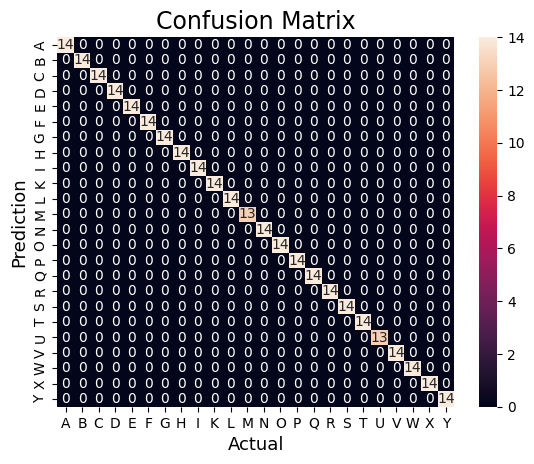

In [48]:
cm = confusion_matrix(y_true,y_p)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=actions,
            yticklabels=actions)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [49]:
y1=model.predict(X_test)

1/1 [==============================] - 0s 147ms/step


In [51]:
s1=y1.shape[0]
y_true1=[]
y_pred1=[]

In [52]:
for i in range(s1):
    l=np.argmax(y1[i])
    y_pred1.append(l)
    l2=np.argmax(y_test[i])
    y_true1.append(l2)
    

In [53]:
print(classification_report(y_true1, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       0.50      1.00      0.67         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       0.00      0.00      0.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          17       1.00    

C:\Users\shrut\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shrut\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shrut\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

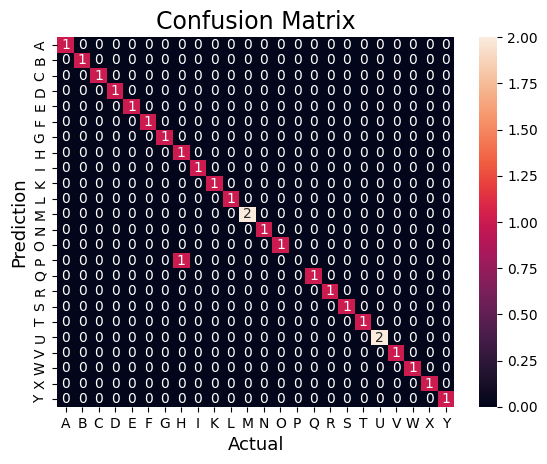

In [54]:
cm = confusion_matrix(y_true1,y_pred1)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=actions,
            yticklabels=actions)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [55]:
len(y_test)

26